In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 25.9 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=9a472c65895299d0432702c6fffdba5bb3e08af6df8e0d078bbd6cab2a9291b1
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('dataframe').getOrCreate()

In [ ]:
df_pyspark=spark.read.csv('/content/drive/MyDrive/Pypask_Course/Indicators.csv',header=True,inferSchema=True)

In [ ]:
df_pyspark.columns

['CountryName',
 'CountryCode',
 'IndicatorName',
 'IndicatorCode',
 'Year',
 'Value']

In [ ]:
#df_pyspark.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from pyspark.sql.functions import col

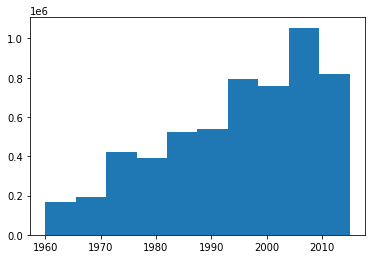

In [ ]:
data = df_pyspark.select(col("Year")).rdd.flatMap(lambda x: x).collect()

# Generar el histograma utilizando Matplotlib
plt.hist(data, bins=10)
plt.show()

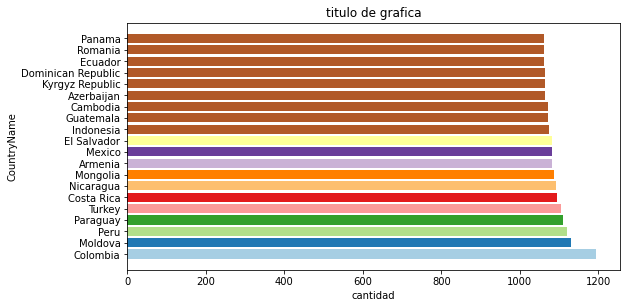

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
from pyspark.sql.functions import desc

# Seleccionar la columna que se desea graficar
data = df_pyspark.filter(col("Year") == 2010 ).groupBy("CountryName").count().orderBy(desc("count")).toPandas()
# Seleccionar solo los primeros 20 países
data = data.head(20)
# Graficar los datos
fig = plt.figure(figsize=(30, 10))
plt.subplot2grid((2, 3), (0, 0))
paired_colors = plt.cm.Paired(range(len(data)))
plt.barh(data["CountryName"], data["count"], color=paired_colors)
plt.title('titulo de grafica')
plt.xlabel('cantidad')
plt.ylabel('CountryName')
plt.show()
#display(fig)


In [ ]:
df_pyspark.show()

+-----------+-----------+--------------------+-----------------+----+------------------+
|CountryName|CountryCode|       IndicatorName|    IndicatorCode|Year|             Value|
+-----------+-----------+--------------------+-----------------+----+------------------+
| Arab World|        ARB|Adolescent fertil...|      SP.ADO.TFRT|1960|133.56090740552298|
| Arab World|        ARB|Age dependency ra...|      SP.POP.DPND|1960|  87.7976011532547|
| Arab World|        ARB|Age dependency ra...|   SP.POP.DPND.OL|1960| 6.634579191565161|
| Arab World|        ARB|Age dependency ra...|   SP.POP.DPND.YG|1960| 81.02332950839141|
| Arab World|        ARB|Arms exports (SIP...|   MS.MIL.XPRT.KD|1960|         3000000.0|
| Arab World|        ARB|Arms imports (SIP...|   MS.MIL.MPRT.KD|1960|            5.38E8|
| Arab World|        ARB|Birth rate, crude...|   SP.DYN.CBRT.IN|1960|47.697888095096395|
| Arab World|        ARB|  CO2 emissions (kt)|   EN.ATM.CO2E.KT|1960|  59563.9892169935|
| Arab World|        

In [ ]:
menor5=df_pyspark.filter("Value<5").toPandas()

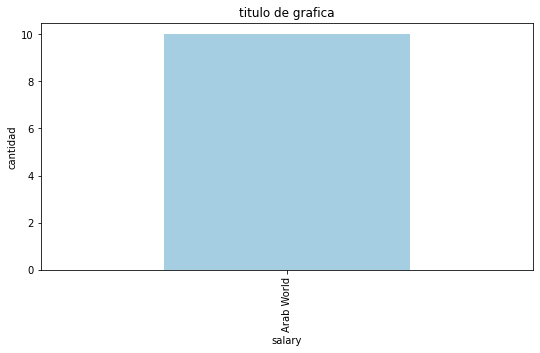

In [ ]:
fig=plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
paired_colors=plt.cm.Paired(range(len(menor5)))

menor5 = menor5.head(20)
#el valor visualizado
# SE VISUALLIZA ASI: archivo.{VARIABLE}........
menor5.CountryName.value_counts().plot(kind='bar',color=paired_colors)

plt.title('titulo de grafica')
plt.xlabel('salary')
plt.ylabel('cantidad')
plt.show()

In [ ]:

# Create a subset of the dataframe with only the columns we need
df_subset = menor5[['CountryName', 'Value']]

# Filter the dataframe to only include rows where Value is between 2 and 4
df_filtered = df_subset[(df_subset['Value'] > 2) & (df_subset['Value'] < 4)]

# Create a bar chart of CountryName vs Value
df_filtered.plot.bar(x='CountryName', y='Value')
plt.show()


NameError: ignored

In [ ]:

# Filter the dataframe to get the rows with Value between 80 and 100
filtered_df = menor5[(menor5['Value'] >= 2) & (menor5['Value'] <= 4)]

# Get the CountryName for the filtered rows
country_name = filtered_df['CountryName'].unique()

# Print the CountryName
print(country_name)


['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'East Asia & Pacific (all income levels)'
 'East Asia & Pacific (developing only)' 'Euro area'
 'Europe & Central Asia (all income levels)'
 'Europe & Central Asia (developing only)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income'
 'High income: nonOECD' 'High income: OECD'
 'Latin America & Caribbean (all income levels)'
 'Latin America & Caribbean (developing only)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income'
 'Middle East & North Africa (all income levels)'
 'Middle East & North Africa (developing only)' 'Middle income'
 'North America' 'OECD members' 'Other small states'
 'Pacific island small states' 'Small states' 'South Asia'
 'Sub-Saharan Africa (all income levels)'
 'Sub-Saharan Africa (developing only)' 'Upper middle income' 'World'
 'Afghanistan' 'Albania' 'Algeria' 'America